In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
import numpy as np

Set plot size

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]

#### Import data

In [3]:
wine = load_wine(as_frame= True)

In [4]:
wine.data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
wine.target.sample(5)

31     0
141    2
85     1
118    1
124    1
Name: target, dtype: int64

Statistics of variables

In [6]:
wine.data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Class distribution

In [7]:
wine.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

#### Class instances

In [8]:
stdscaler = StandardScaler()

In [9]:
pca = PCA(n_components= 2)

In [10]:
cluster = KMeans(n_clusters= 3, random_state= 42)

#### Scale data, then project it to 2d

In [11]:
scaled_wine = stdscaler.fit_transform(wine.data)

In [12]:
projected_wine = pca.fit_transform(scaled_wine)

In [13]:
projected_wine.shape

(178, 2)

Plot of wine dataset after PCA

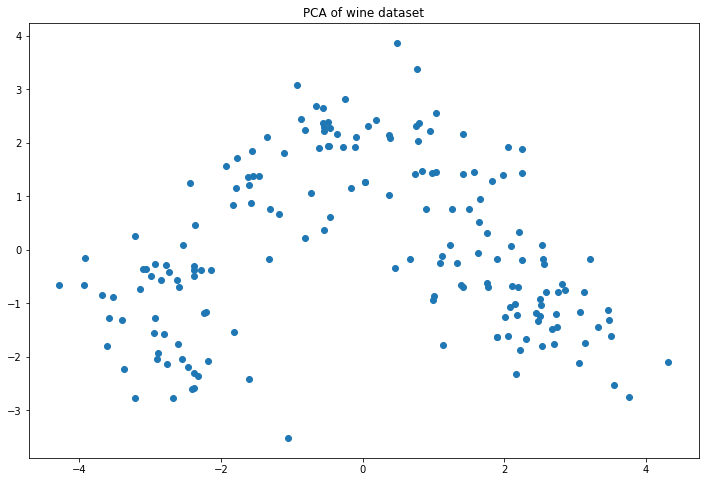

In [14]:
plt.title('PCA of wine dataset')
plt.scatter(projected_wine[:, 0], projected_wine[:, 1]);

#### Clustering

On unscaled and scaled data

In [15]:
cluster.fit(wine.data)

KMeans(n_clusters=3, random_state=42)

In [16]:
unscaled_cluster_pred = cluster.labels_

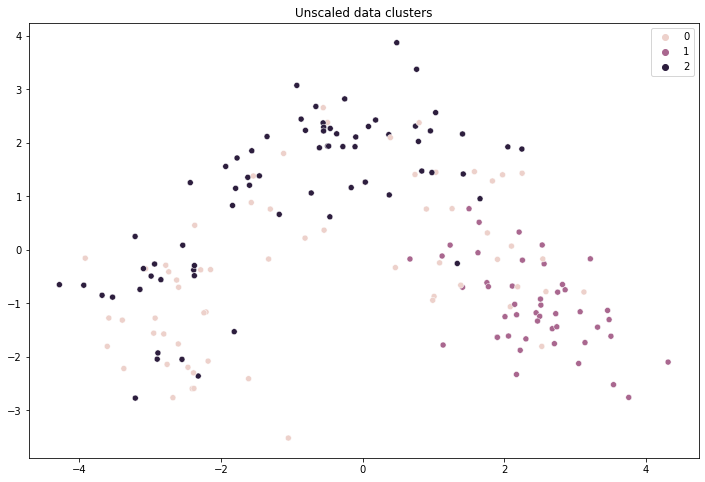

In [17]:
plt.title('Unscaled data clusters')
sns.scatterplot(x= projected_wine[:, 0], y= projected_wine[:, 1], hue= unscaled_cluster_pred);

#### Create pipeline

In [18]:
pipe = make_pipeline(stdscaler, cluster)
pipe.fit(wine.data)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

In [19]:
scaled_cluster_pred = pipe.fit_predict(wine.data)

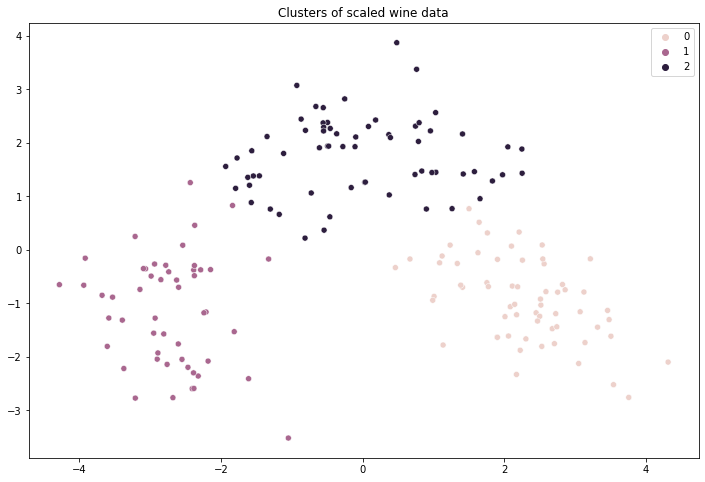

In [20]:
plt.title('Clusters of scaled wine data')
sns.scatterplot(x= projected_wine[:, 0], y= projected_wine[:, 1], hue= scaled_cluster_pred);
plt.savefig('clusters.png')

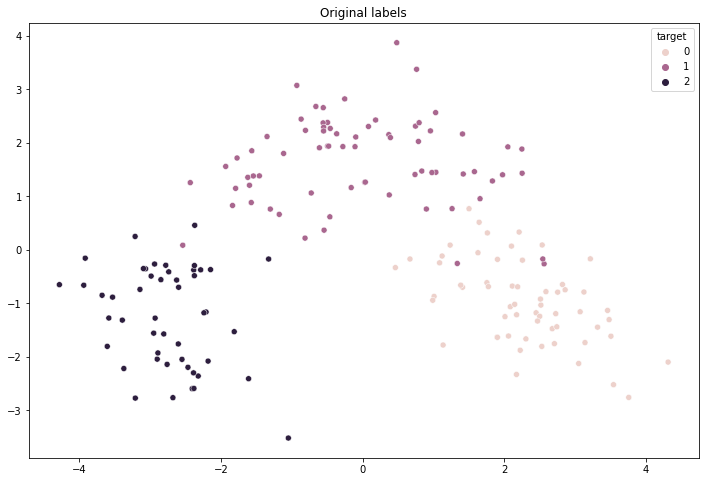

In [21]:
plt.title('Original labels')
sns.scatterplot(x= projected_wine[:, 0], y= projected_wine[:, 1], hue= wine.target);
plt.savefig('wine_labels.png')

#### Evaluation

In [27]:
metrics.accuracy_score(wine.target, unscaled_cluster_pred) # no scaling results in horrible performance here

0.1853932584269663

In [23]:
metrics.accuracy_score(wine.target, scaled_cluster_pred)

0.34831460674157305

In [24]:
scaled_cluster_pred, wine.target.values

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1], dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1

#### True accuracy

In [25]:
pred_classes, pred_frequency = np.unique(scaled_cluster_pred,
                                         return_counts = True)
true_classes, true_frequency = np.unique(wine.target,
                                         return_counts = True)

print(f"Predicted classes: {pred_classes}, their frequency: {pred_frequency}.")
print(f"True classes: {true_classes}, their frequency: {true_frequency}")

Predicted classes: [0 1 2], their frequency: [62 51 65].
True classes: [0 1 2], their frequency: [59 71 48]


Predicted clusters, errors are encircled. 

![image](accuracy.png)

In [26]:
f"The true accuracy is {(wine.target.shape[0] - 6) * 100 / wine.target.shape[0]:.4f} %." # 6 errors

'The true accuracy is 96.6292 %.'

#### Conclusion

The algorithm with an **accuracy of ~ 97%** identified the clusters, however, the labels of "class 1" and "class 2" were exchanged, hence the low "initial" accuracy score (~34.8 %).